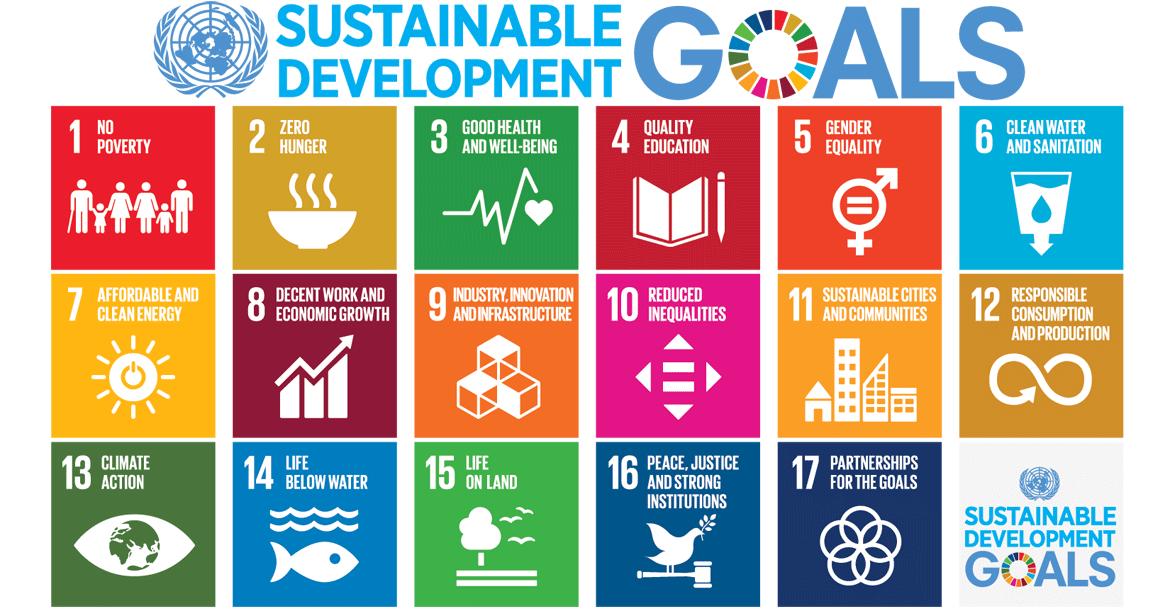

1. [Introduction](#introduction)
2. [Connecting to ArcGIS Online](#arcgis_online)
3. [Processing the Data](#dataprocessing)

### Introduction <a name="introduction"></a>
#### These will guide you through how to work with your data and publishing to ArcGIS Online for sharing with the UN SDG Hub

## External Content - GitHub Repo, Links and training, other Notebooks


In [30]:
from IPython.core.display import display, HTML
import requests
import io
import time
import re

## <a name="arcgis_online">Connect to ArcGIS </a>
#### This will connect the user to the ArcGIS Online Organization

In [31]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor
from arcgis.features import FeatureLayerCollection
gis = GIS("home")


/opt/conda/lib/python3.7/site-packages/arcgis/gis/__init__.py:430: UserWarning: You are logged on as tbutcher_undesa with an administrator role, proceed with caution.
  self.users.me.username)


#### Bring in the Pandas and options

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# <a name="dataprocessing">Processing the Data </a>

First, we want to define the data release that we want to pull from:

In [54]:
#chose the goal, target, indicator and series for this data
release = '2020.Q1.G.02'
set_goal = 4
set_target = 5
set_indicator = 1
set_series = "SE_LGP_ACHI"

#choose language - 'english', 'french'
card_lang = 'english'

#is this an update or a new file (set to true if existing item - you must provide the item you are updating if update=True)
update = False
update_item_point = '87b8d2a571b8447ba23de13971a6ff04'
update_item_polygon = '15bc144b6a26420bb4aa69a3cfd8db47'

#Country Layer to join the SDG Data to
un_country_layer_id = '25c570fd7f074471b98f5108792aaa84'

#Statistic Variable
statistic_field = "latest_value"

#Aggregation List for the Series 
code_metadata = 'https://raw.githubusercontent.com/UNStats/fis4sdg_2020/master/data/interim/2020.Q2.G.03/TS/views_.json'

In [34]:
sdg_key = "Indicator_" + str(set_goal) + "_" + str(set_target) + "_" + str(set_indicator) + "__Series_" + str(set_series)

#create timestamp to allow rerunning
stamp = str(time.time() * 1000).replace(".","")

print('Processing SDG Information for', sdg_key, stamp)

Processing SDG Information for Indicator_4_5_1__Series_SE_LGP_ACHI 16196511232134307


#### Links for the UN GitHub Repo to access items

In [35]:
un_github_data = "https://github.com/UNStats/fis4sdg_2020"
un_github_raw = un_github_data.replace('github.com', 'raw.githubusercontent.com')
un_github_csv = un_github_raw +"/master/data/processed/" + release + "/" + sdg_key + ".csv"
un_github_metadata = un_github_raw +"/master/data/external/metadata_" + release + ".json"

#### Load the Metadata JSON (will be used in population of the data cards)

In [36]:
print(un_github_metadata)
metadata = requests.get(un_github_metadata)
series_metadata = metadata.json()
series_metadata

https://raw.githubusercontent.com/UNStats/fis4sdg_2020/master/data/external/metadata_2020.Q1.G.02.json


[{'code': '1',
  'labelEN': 'Goal 1',
  'descEN': 'End poverty in all its forms everywhere',
  'labelES': 'Objetivo 1',
  'descES': 'Poner fin a la pobreza en todas sus formas y en todo el mundo',
  'labelFR': 'Objectif 1',
  'descFR': 'Éliminer la pauvreté sous toutes ses formes et partout dans le monde',
  'labelRU': 'Цель 1',
  'descRU': 'Повсеместная ликвидация нищеты во всех ее формах',
  'labelZN': '目标1',
  'descZN': '在全世界消除一切形式的贫穷',
  'hex': 'e5243b',
  'rgb': [229, 36, 59],
  'ColorScheme': ['FFDA99',
   'FAC590',
   'F5967F',
   'F1786E',
   'ED5C5E',
   'E5233D',
   'BF162F',
   '93071F'],
  'thumbnail': 'https://raw.githubusercontent.com/UNStats/FIS4SDGs_New/master/sdgIcons/sdgIcons_thumbnails/SDG01.png',
  'targets': [{'code': '1.1',
    'labelEN': 'Target 1.1',
    'descEN': 'By 2030, eradicate extreme poverty for all people everywhere, currently measured as people living on less than $1.25 a day',
    'labelES': 'Meta 1.1',
    'descES': 'De aquí a 2030, erradicar para to

Now that we have opened our json file, we can pull the data we want from it.

In [37]:
goal_properties = list(series_metadata[0].keys())

target_properties = list(series_metadata[1]['targets'][0].keys())

indicator_properties = list(
    series_metadata[1]['targets'][0]['indicators'][0].keys())

series_properties = list(
    series_metadata[1]['targets'][0]['indicators'][0]['series'][0].keys())

In [38]:
print(goal_properties)
print(target_properties)
print(indicator_properties)
print(series_properties)

['code', 'labelEN', 'descEN', 'labelES', 'descES', 'labelFR', 'descFR', 'labelRU', 'descRU', 'labelZN', 'descZN', 'hex', 'rgb', 'ColorScheme', 'thumbnail', 'targets']
['code', 'labelEN', 'descEN', 'labelES', 'descES', 'labelFR', 'descFR', 'labelRU', 'descRU', 'labelZN', 'descZN', 'indicators']
['code', 'reference', 'labelEN', 'descEN', 'labelES', 'descES', 'labelFR', 'descFR', 'labelRU', 'descRU', 'labelZN', 'descZN', 'series']
['code', 'description', 'release', 'tags']


In [39]:
goal_dict = series_metadata[set_goal - 1]
target_dict = goal_dict['targets'][set_target - 1]
indicator_dict = target_dict['indicators'][set_indicator - 1]

series_index = 0
for i in range(len(indicator_dict['series'])-1):
    print(indicator_dict['series'][i]['code'])
    if set_series == indicator_dict['series'][i]['code']:
        series_index = i
        
series_dict = indicator_dict['series'][series_index]

#print(goal_dict)
#print(target_dict)
print(indicator_dict)
print(series_dict)

SE_PRE_GPIPARTN
SE_GPI_TRATEA
SE_GPI_PART
SE_GPI_ICTS
SE_IMP_FPOF
SE_NAP_ACHI
SE_LGP_ACHI
SE_TOT_GPI
SE_TOT_SESPI
{'code': 'C040501', 'reference': '4.5.1', 'labelEN': 'Indicator 4.5.1', 'descEN': 'Parity indices (female/male, rural/urban, bottom/top wealth quintile and others such as disability status, indigenous peoples and conflict-affected, as data become available) for all education indicators on this list that can be disaggregated', 'labelES': 'Indicador 4.5.1', 'descES': 'Índices de paridad (entre mujeres y hombres, zonas rurales y urbanas, quintiles de riqueza superior e inferior y grupos como los discapacitados, los pueblos indígenas y los afectados por los conflictos, a medida que se disponga de datos) para todos los indicadores educativos de esta lista que puedan desglosarse', 'labelFR': 'Indicateur 4.5.1', 'descFR': 'Indices de parité (femmes/hommes, urbain/rural, quintile inférieur/supérieur de richesse et autres paramètres tels que le handicap, le statut d’autochtone et le

### <a name="formatting_structure">Building the CSVs</a>

##### For each series we have a dataset in a CSV format. However, in order to visualize this information spatially we want to join this table to a GeoJSON, Shapefile, or Feature Service. 

#### Bring in the CSV File from the Github Repository and convert to a Pandas Dataframe for processing

In [40]:
print(un_github_csv)
tabular = requests.get(un_github_csv).content
tabular_df = pd.read_csv(io.StringIO(tabular.decode('utf-8')), sep='\t')
tabular_df

https://raw.githubusercontent.com/UNStats/fis4sdg_2020/master/data/processed/2020.Q1.G.02/Indicator_4_5_1__Series_SE_LGP_ACHI.csv


,goal_code,goal_labelEN,goal_descEN,target_code,target_descEN,indicator_code,indicator_reference,indicator_descEN,series_release,series_tags,series,seriesDescription,geoAreaCode,geoAreaName,level,parentCode,parentName,type,X,Y,ISO3,UN_Member,Country_Profile,timeCoverage,geoInfoUrl,educationLevel_code,educationLevel_desc,typeOfSkill_code,typeOfSkill_desc,years,min_year,max_year,n_years,unitsCode,unitsDesc,reportingTypeCode,reportingTypeDesc,value_2000,value_2001,value_2003,value_2006,value_2007,value_2009,value_2011,value_2012,value_2015,value_2016,value_2018,latest_value,basePeriod,valueDetails,footnotes,sources,timeDetails,nature
0,4,Goal 4,Ensure inclusive and equitable quality educati...,4.5,"By 2030, eliminate gender disparities in educa...",C040501,4.5.1,"Parity indices (female/male, rural/urban, bott...",2020.Q1.G.02,"['education', 'equality']",SE_LGP_ACHI,Language test parity index for achievement (ra...,100,Bulgaria,4,151,Eastern Europe,Country,25.237632,42.757313,BGR,1,1,NaN,NaN,ISCED11_2,Lower secondary,SKILL_READ,Skill: Minimum proficiency in reading,"[2000, 2006, 2009, 2012, 2015, 2018]",2000,2018,6,RO,Ratio,G,Global,0.312273,NaN,NaN,0.380319,NaN,0.405102,NaN,0.327494,0.422945,NaN,0.434191,0.434191,NaN,NaN,NaN,[2000]: PISA 2000 // [2006]: PISA 2006 // [200...,NaN,C: Country data
1,4,Goal 4,Ensure inclusive and equitable quality educati...,4.5,"By 2030, eliminate gender disparities in educa...",C040501,4.5.1,"Parity indices (female/male, rural/urban, bott...",2020.Q1.G.02,"['education', 'equality']",SE_LGP_ACHI,Language test parity index for achievement (ra...,100,Bulgaria,4,151,Eastern Europe,Country,25.237632,42.757313,BGR,1,1,NaN,NaN,ISCED11_2,Lower secondary,SKILL_MATH,Skill: Minimum proficiency in mathematics,"[2000, 2006, 2009, 2012, 2015, 2018]",2000,2018,6,RO,Ratio,G,Global,0.517786,NaN,NaN,0.383199,NaN,0.457539,NaN,0.436976,0.463060,NaN,0.564450,0.564450,NaN,NaN,NaN,[2000]: PISA 2000 // [2006]: PISA 2006 // [200...,NaN,C: Country data
2,4,Goal 4,Ensure inclusive and equitable quality educati...,4.5,"By 2030, eliminate gender disparities in educa...",C040501,4.5.1,"Parity indices (female/male, rural/urban, bott...",2020.Q1.G.02,"['education', 'equality']",SE_LGP_ACHI,Language test parity index for achievement (ra...,100,Bulgaria,4,151,Eastern Europe,Country,25.237632,42.757313,BGR,1,1,NaN,NaN,ISCED11_1,Primary,SKILL_READ,Skill: Minimum proficiency in reading,"[2001, 2006, 2011, 2016]",2001,2016,4,RO,Ratio,G,Global,NaN,0.926684,NaN,0.873804,NaN,NaN,0.707088,NaN,NaN,0.836375,NaN,0.836375,NaN,NaN,NaN,[2001]: PIRLS 2001 // [2006]: PIRLS 2006 // [2...,NaN,C: Country data
3,4,Goal 4,Ensure inclusive and equitable quality educati...,4.5,"By 2030, eliminate gender disparities in educa...",C040501,4.5.1,"Parity indices (female/male, rural/urban, bott...",2020.Q1.G.02,"['education', 'equality']",SE_LGP_ACHI,Language test parity index for achievement (ra...,100,Bulgaria,4,151,Eastern Europe,Country,25.237632,42.757313,BGR,1,1,NaN,NaN,ISCED11_1,Primary,SKILL_MATH,Skill: Minimum proficiency in mathematics,[2015],2015,2015,1,RO,Ratio,G,Global,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.597598,NaN,NaN,0.597598,NaN,NaN,NaN,TIMSS 2015,NaN,C: Country data
4,4,Goal 4,Ensure inclusive and equitable quality educati...,4.5,"By 2030, eliminate gender disparities in educa...",C040501,4.5.1,"Parity indices (female/male, rural/urban, bott...",2020.Q1.G.02,"['education', 'equality']",SE_LGP_ACHI,Language test parity index for achievement (ra...,112,Belarus,4,151,Eastern Europe,Country,28.049402,53.541931,BLR,1,1,NaN,NaN,ISCED11_2,Lower secondary,SKILL_READ,Skill: Minimum proficiency in reading,[2018],2018,2018,1,RO,Ratio,G,Global,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.694696,0.694696,NaN,NaN,NaN,PISA 2018,NaN,C: Country data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

#### Publish the CSV File -  publish as item into AGO using the Latitude and Longitude in the Reference Data

In [41]:
tabular_df['latitude'] = tabular_df['Y']
tabular_df['longitude'] = tabular_df['X']
tabular_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goal_code            333 non-null    int64  
 1   goal_labelEN         333 non-null    object 
 2   goal_descEN          333 non-null    object 
 3   target_code          333 non-null    float64
 4   target_descEN        333 non-null    object 
 5   indicator_code       333 non-null    object 
 6   indicator_reference  333 non-null    object 
 7   indicator_descEN     333 non-null    object 
 8   series_release       333 non-null    object 
 9   series_tags          333 non-null    object 
 10  series               333 non-null    object 
 11  seriesDescription    333 non-null    object 
 12  geoAreaCode          333 non-null    int64  
 13  geoAreaName          333 non-null    object 
 14  level                333 non-null    int64  
 15  parentCode           333 non-null    int

In [43]:
if update:
    point_layer = gis.content.get(update_item_points)
    existing_features = point_layer.layers[0]
    existing_features.manager.truncate()
    #TODO:  Update the Point Layer with the CSV File
else:
    csv_file = '/arcgis/home/' + sdg_key + "_" + stamp +'.csv'
    tabular_df.to_csv(csv_file, encoding="utf-8", index=False)
    csv_item = gis.content.add({}, csv_file)
    csv_item
    publish_parameters={'type': 'csv', 'name': sdg_key, 'locationType': 'coordinates', 'longitudeFieldName': 'longitude' , 'latitudeFieldName': 'latitude'}
    point_layer = csv_item.publish(None, publish_parameters)
point_layer

Exception: Item 'Indicator_4_5_1__Series_SE_LGP_ACHI_16196511232134307.csv' already exists.
(Error Code: 409)

### <a name="formatting_structure">Join the Tabular data to a polygon layer</a>

#### Bring in a layer of country boudaries

<Item title:"TM_WORLD_BORDERS" type:Feature Layer Collection owner:tbutcher_undesa>
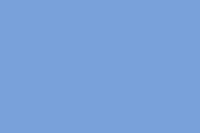

In [44]:
un_country_item = gis.content.get(un_country_layer_id)
un_country_item

#### Get the Polygon Features as a Spatial Data Frame

In [45]:
un_country_layer = un_country_item.layers[0]
un_country_features = un_country_layer.query(where='1=1', as_df=True)
un_country_features

,FID,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,Shape__Area,Shape__Length,SHAPE
0,1,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,2.247509e+08,1.046185e+05,"{""rings"": [[[-6866928.47049373, 1923670.301966..."
1,2,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,3.019925e+12,7.874373e+06,"{""rings"": [[[329907.556109855, 4411573.9880643..."
2,3,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,1.462819e+11,2.762960e+06,"{""rings"": [[[5018652.50675464, 4832292.3029818..."
3,4,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,4.756838e+10,1.073498e+06,"{""rings"": [[[2163629.44542909, 5015449.2432207..."
4,5,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,5.210924e+10,1.279372e+06,"{""rings"": [[[5026505.98676078, 5041679.7948820..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,242,TB,BL,BLM,652,Saint Barthelemy,0,0,19,29,-63.043,18.040,4.231607e+07,3.406408e+04,"{""rings"": [[[-7016282.26906734, 2039369.076326..."
242,243,GK,GG,GGY,831,Guernsey,0,0,150,154,-2.576,49.459,7.450665e+07,4.933911e+04,"{""rings"": [[[-288410.321609891, 6346856.058237..."
243,244,JE,JE,JEY,832,Jersey,0,0,150,154,-2.129,49.219,1.436080e+08,6.178079e+04,"{""rings"": [[[-224308.773948438, 6311279.151919..."
244,245,SX,GS,SGS,239,South Georgia South Sandwich Islands,0,0,0,0,-36.891,-54.209,1.378467e+10,9.509506e+05,"{""rings"": [[[-3041898.1490205, -8273304.770570..."


#### Merge the Tabular Data Frame with the Spatial Data Frame

In [46]:
countries_df = pd.merge(un_country_features, tabular_df, left_on='ISO3', right_on='ISO3')
countries_df.drop(columns=['FID','POP2005', 'REGION', 'LON', 'LAT','Shape__Area','Shape__Length'], inplace=True)
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 333 non-null    object 
 1   ISO2                 333 non-null    object 
 2   ISO3                 333 non-null    object 
 3   UN                   333 non-null    int64  
 4   NAME                 333 non-null    object 
 5   AREA                 333 non-null    int64  
 6   SUBREGION            333 non-null    int64  
 7   SHAPE                333 non-null    object 
 8   goal_code            333 non-null    int64  
 9   goal_labelEN         333 non-null    object 
 10  goal_descEN          333 non-null    object 
 11  target_code          333 non-null    float64
 12  target_descEN        333 non-null    object 
 13  indicator_code       333 non-null    object 
 14  indicator_reference  333 non-null    object 
 15  indicator_descEN     333 non-null    obj

#### Publish the polygon layer or join analysis with existing layer.  publish the tabular as an table service then join with the boudaries

In [47]:
if update:
    published_polygon_layer = GeoAccessor.from_df(countries_df, geometry_column='SHAPE')
    polygon_layer = gis.content.get(update_item_polygons)
    existing_features = polygon_layer.layers[0]
    existing_features.manager.truncate()
    existing_features.edit_features(adds=published_polygon_layer)

In [48]:
feature_layer_key = sdg_key + "_" + stamp
if not update:
    print(feature_layer_key)
    published_polygon_layer = countries_df.spatial.to_featurelayer(feature_layer_key)
    
published_polygon_layer

Indicator_4_5_1__Series_SE_LGP_ACHI_16196511232134307


<Item title:"Indicator_4_5_1__Series_SE_LGP_ACHI_16196511232134307" type:Feature Layer Collection owner:tbutcher_undesa>

### Build a view for each of the Aggregation Types
#### Each datasource can be broken in many different types and aggregations.  We can use a view in ArcGIS Online to visualize each of these disaggregations of data as needed.

In [49]:
source_flc = FeatureLayerCollection.fromitem(published_polygon_layer)
source_flc

<FeatureLayerCollection url:"https://services7.arcgis.com/gp50Ao2knMlOM89z/arcgis/rest/services/a7c79c/FeatureServer">

In [50]:
print(countries_df.info())
print(source_flc.layers[.fields())

SyntaxError: invalid syntax (<ipython-input-50-07bef7702a2c>, line 2)

In [55]:
#Get the filters from JSON
filter_json = requests.get(code_metadata) #move to variables
filters = filter_json.json()

for i in range(len(filters)-1):
    if filters[i]['series'] == set_series:
        aggregation_keys = filters[i]['filters']
        aggregation_labels = filters[i]['labels']

print(aggregation_keys, aggregation_labels)

[{'educationLevel_code': 'ISCED11_2', 'typeOfSkill_code': 'SKILL_READ'}, {'educationLevel_code': 'ISCED11_2', 'typeOfSkill_code': 'SKILL_MATH'}, {'educationLevel_code': 'ISCED11_1', 'typeOfSkill_code': 'SKILL_READ'}, {'educationLevel_code': 'ISCED11_1', 'typeOfSkill_code': 'SKILL_MATH'}, {'educationLevel_code': 'ISCED11A_0_G23', 'typeOfSkill_code': 'SKILL_MATH'}, {'educationLevel_code': 'ISCED11A_0_G23', 'typeOfSkill_code': 'SKILL_READ'}] ['Lower secondary; Skill: Minimum proficiency in reading', 'Lower secondary; Skill: Minimum proficiency in mathematics', 'Primary; Skill: Minimum proficiency in reading', 'Primary; Skill: Minimum proficiency in mathematics', 'Grades 2/3; Skill: Minimum proficiency in mathematics', 'Grades 2/3; Skill: Minimum proficiency in reading']


In [ ]:
#Get List of Quantiles
views = [{"key": "parent", "layer": published_polygon_layer}]

#"(type_of_skill_code = 'SKILL_MATH') AND (education_level_code = 'ISCED11A_0_G23')"
for aggregation_key in aggregation_keys:
    filter_query = ""
    viewname = ""
    for k, v in aggregation_key.items():
        filter_query += "(" + re.sub(r"(?<!^)(?=[A-Z])", '_', k).lower() + " = '" + v + "') AND "
        viewname += v
    
    filter_query = filter_query[:len(filter_query) - 5]
    feature_layer_key = sdg_key + "_" + stamp
    print("Creating view for aggregation", filter_query)
    view_name = feature_layer_key + "_" + viewname
    print(view_name)
        
    new_view = source_flc.manager.create_view(name=view_name)
    view_flc = FeatureLayerCollection.fromitem(new_view)
    service_layer = view_flc.layers[0]
    update_dict = {"viewDefinitionQuery" : filter_query }
    print(update_dict)
    service_layer.manager.update_definition(update_dict)
    views.append({"key": viewname, "layer": new_view})

Creating view for aggregation (education_level_code = 'ISCED11_2') AND (type_of_skill_code = 'SKILL_READ')
Indicator_4_5_1__Series_SE_LGP_ACHI_16196511232134307_ISCED11_2SKILL_READ
{'viewDefinitionQuery': "(education_level_code = 'ISCED11_2') AND (type_of_skill_code = 'SKILL_READ')"}
Creating view for aggregation (education_level_code = 'ISCED11_2') AND (type_of_skill_code = 'SKILL_MATH')
Indicator_4_5_1__Series_SE_LGP_ACHI_16196511232134307_ISCED11_2SKILL_MATH
{'viewDefinitionQuery': "(education_level_code = 'ISCED11_2') AND (type_of_skill_code = 'SKILL_MATH')"}
Creating view for aggregation (education_level_code = 'ISCED11_1') AND (type_of_skill_code = 'SKILL_READ')
Indicator_4_5_1__Series_SE_LGP_ACHI_16196511232134307_ISCED11_1SKILL_READ
{'viewDefinitionQuery': "(education_level_code = 'ISCED11_1') AND (type_of_skill_code = 'SKILL_READ')"}


In [90]:
for view in views:
    print(view)

{'key': 'parent', 'layer': <Item title:"Indicator Parity indices (female/male, rural/urban, bottom/top wealth quintile and others such as disability status, indigenous peoples and conflict-affected, as data become available) for all education indicators on this list that can be disaggregat.." type:Feature Layer Collection owner:tbutcher_undesa>}
{'key': 'ISCED11_2SKILL_READ', 'layer': <Item title:"Indicator_4_5_1__Series_SE_LGP_ACHI_16189493590955366_ISCED11_2SKILL_READ" type:Feature Layer Collection owner:tbutcher_undesa>}
{'key': 'ISCED11_2SKILL_MATH', 'layer': <Item title:"Indicator_4_5_1__Series_SE_LGP_ACHI_16189493590955366_ISCED11_2SKILL_MATH" type:Feature Layer Collection owner:tbutcher_undesa>}
{'key': 'ISCED11_1SKILL_READ', 'layer': <Item title:"Indicator_4_5_1__Series_SE_LGP_ACHI_16189493590955366_ISCED11_1SKILL_READ" type:Feature Layer Collection owner:tbutcher_undesa>}
{'key': 'ISCED11_1SKILL_MATH', 'layer': <Item title:"Indicator_4_5_1__Series_SE_LGP_ACHI_16189493590955366

### <a name="formatting_structure">Building the Metadata Cards</a>

Create a dictionary that contains all of the item's metadata information to be presented on ArcGIS Online.

In [91]:
language_dict = {'english': 'EN', 'spanish': 'ES', 'french': 'FR', 'russian': 'RU', 'chinese': 'ZN'}
lang_str = language_dict[card_lang]

#### Build out the Series card,  this will take information from the metadata to create a consistent card and styling

In [92]:
series_card = dict()
series_desc = series_dict['description'].replace('%', 'percent').replace(',', ' ').replace('/', ' ')
title = 'Indicator ' + indicator_dict['desc'+ lang_str] + ': ' + series_desc
series_card['title'] = (title[:250] + '..') if len(title) > 250 else title
layer_title = 'Indicator_' + \
    indicator_dict['reference'].replace('.', '_') + '__Series_' + series_dict['code']
series_card['layer_title'] = layer_title[:89] if len(layer_title) > 88 else layer_title  
series_card['snippet'] = series_card['title']

series_card['description'] =  \
        '<div style="background-color: #' + goal_dict['hex'] + '; color:#fff; padding: 15px">' + \
        '<ul style="list-style: none;">' + \
        '<li><strong> Series Name:</strong> ' + series_desc + '</li>' + \
        '<li><strong>Series Code:</strong> ' + series_dict['code'] + '</li>' + \
        '<li><strong>Release Version:</strong> ' + series_dict['release'] + '</li>' + \
        '</ul>' + \
        '</div>' + \
        '<div style="background-color: #f4f4f4; padding: 15px">' + \
        '<p> This dataset is the part of the Global SDG Indicator Database compiled ' + \
        'through the UN System in preparation for the Secretary-General\'s annual report on <em>Progress towards the Sustainable Development Goals</em>.' + \
        '</p>' + \
        '<p><strong>Indicator ' + indicator_dict['reference'] + ': </strong>' + indicator_dict['desc'+ lang_str] + \
        '</p>' + \
        '<p><strong>Target ' + target_dict['code'] + ': </strong>' + target_dict['desc'+ lang_str] + \
        '</p>' + \
        '<p><strong>Goal ' + goal_dict['code'] + ': </strong>' + goal_dict['desc'+ lang_str] + \
        '</p>' +  \
        '<p><em>For more information on the compilation methodology of this dataset, ' +\
        ' see <a href="https://unstats.un.org/sdgs/metadata/" target="_blank">https://unstats.un.org/sdgs/metadata/' + \
        '</a></em></p>' + \
        '</div>'

series_tags = series_dict['tags'][:]
series_tags.append(series_dict['release'])
series_card['tags'] = series_tags
display(HTML(series_card['description']))

#### Update the Point Centroid Item

<Item title:"Indicator Parity indices (female/male, rural/urban, bottom/top wealth quintile and others such as disability status, indigenous peoples and conflict-affected, as data become available) for all education indicators on this list that can be disaggregat.." type:Feature Layer Collection owner:tbutcher_undesa>
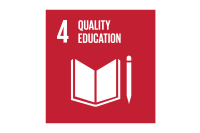

In [93]:
point_layer.update(series_card,thumbnail= goal_dict['thumbnail'])
point_layer

In [94]:
series_title = series_card["title"]
if len(series_title) > 256:
    series_title = series_title[:250] + '..'

for view in views:
    item = view["layer"]
    if view["key"] != "parent":
        view_key = " (" + view["key"] +")"
        trim_len = len(view_key)
        series_title = series_title + " (" + view["key"] +")"
        if len(series_title + view_key) > 256:
            
            series_title = series_title[:250 - len(view_key)] + '..' + view_key
    
    series_card["title"] = series_title
    item.update(series_card,thumbnail= goal_dict['thumbnail'])
    print(item)

<Item title:"Indicator Parity indices (female/male, rural/urban, bottom/top wealth quintile and others such as disability status, indigenous peoples and conflict-affected, as data become available) for all education indicators on this list that can be disaggregat.." type:Feature Layer Collection owner:tbutcher_undesa>
<Item title:"Indicator Parity indices (female/male, rural/urban, bottom/top wealth quintile and others such as disability status, indigenous peoples and conflict-affected, as data become available) for all education indicators on this list t.. (ISCED11_2SKILL_READ)" type:Feature Layer Collection owner:tbutcher_undesa>
<Item title:"Indicator Parity indices (female/male, rural/urban, bottom/top wealth quintile and others such as disability status, indigenous peoples and conflict-affected, as data become available) for all education indicators on this list t.. (ISCED11_2SKILL_MATH)" type:Feature Layer Collection owner:tbutcher_undesa>
<Item title:"Indicator Parity indices (f

### <a name="formatting_structure">Apply the Symbology</a>
#### Symbology will be designed using the color ramp in the metadata file for this goal, target, and indicator.  The latest_value field is used to allow the symbol to be colored across that ramp

In [27]:
def getDrawingInfo(item):
    #Statistic Variable
    statistic_field = "latest_value"

    #Color Scheme
    color_list = goal_dict['ColorScheme']
    color_scheme = []

    for c in color_list:
        s = str(c)
        rgb_val = tuple(int(s[i:i+2], 16) for i in (0,2,4))
        rgb_list = list(rgb_val)
        rgb_list.append(255)
        color_scheme.append(rgb_val)

    #Set Min/Max Values
    out_statistics = [{'statisticType': 'max',
                        'onStatisticField': statistic_field,
                        'outStatisticFieldName': statistic_field + '_max'},
                        {'statisticType': 'min',
                        'onStatisticField': statistic_field,
                        'outStatisticFieldName': statistic_field + '_min'}]

    features = item.layers[0]

    feature_set = features.query(
        where='1=1', out_statistics=out_statistics)

    max_value = feature_set.features[0].attributes[statistic_field + '_max']
    min_value = feature_set.features[0].attributes[statistic_field + '_min']

    value_interval = (max_value - min_value)/10
    
    return {"drawingInfo": {
    "renderer":{
        "authoringInfo":{
            "type":"classedColor",
            "classificationMethod":"esriClassifyEqualInterval"
            },
        "type":"classBreaks",
        "field":"latest_value",
        "minValue":min_value,
        "classBreakInfos":[{
            "symbol":{
                "color":color_scheme[0],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS",
                    "style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":str(min_value)+" - "+str(min_value + value_interval),
            "classMaxValue":min_value + value_interval
            },
            {"symbol":{
                "color":color_scheme[1],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS",
                    "style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":"\u003e " + str(min_value + value_interval)+" - "+str(min_value + value_interval*2),
            "classMaxValue":min_value + value_interval*2
            },
            {"symbol":{
                "color":color_scheme[2],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS",
                    "style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":"\u003e " + str(min_value + value_interval*2)+" - "+str(min_value + value_interval*3),
            "classMaxValue":min_value + value_interval*3
            },
            {"symbol":{
                "color":color_scheme[3],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS",
                    "style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":"\u003e " + str(min_value + value_interval*3)+" - "+str(min_value + value_interval*4),
            "classMaxValue":min_value + value_interval*4
            },
            {"symbol":{
                "color":color_scheme[4],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS",
                    "style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":"\u003e " + str(min_value + value_interval*4)+" - "+str(min_value + value_interval*5),
            "classMaxValue":min_value + value_interval*5
            },
            {"symbol":{
                "color":color_scheme[5],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS",
                    "style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":"\u003e " + str(min_value + value_interval*5)+" - "+str(min_value + value_interval*6),
            "classMaxValue":min_value + value_interval*6
            },
            {"symbol":{
                "color":color_scheme[6],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS","style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":"\u003e " + str(min_value + value_interval*6)+" - "+str(min_value + value_interval*7),
            "classMaxValue":min_value + value_interval*7
            },
            {"symbol":{
                "color":color_scheme[7],
                "outline":{
                    "color":[194,194,194,64],
                    "width":0.375,
                    "type":"esriSLS",
                    "style":"esriSLSSolid"
                    },
                "type":"esriSFS",
                "style":"esriSFSSolid"
                },
            "label":"\u003e " + str(min_value + value_interval*7)+" - "+str(min_value + value_interval*8),
            "classMaxValue":max_value
            }],
        "classificationMethod":"esriClassifyEqualInterval"
        },
    "transparency":20}}
    

#### This will loop through each of the view we have created and use the symbology function to style the data

In [28]:
for view in views:
    item = view["layer"]
    drawing_info = getDrawingInfo(item)
    view_flc = FeatureLayerCollection.fromitem(item)
    layer = view_flc.layers[0]
    layer.manager.update_definition(drawing_info)
    print(layer.properties)

['F5DDDD', 'E1B3B2', 'CF8D8C', 'C84F59', 'C22033', 'A22035', '792037', '462039']
{
  "currentVersion": 10.81,
  "id": 0,
  "name": "a2afeb82",
  "type": "Feature Layer",
  "serviceItemId": "59895d3e16d6425f9efc78c821e7b078",
  "sourceSchemaChangesAllowed": true,
  "hasViews": true,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1618949950802
  },
  "relationships": [],
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": true,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides ": true,
  "supportsTilesAndBasicQueriesMode": true,
  "support

{
  "currentVersion": 10.81,
  "id": 0,
  "name": "a2afeb82",
  "type": "Feature Layer",
  "serviceItemId": "e1ed68b9fb7447baa16d28c8f2e5cb54",
  "isView": true,
  "isUpdatableView": true,
  "sourceSchemaChangesAllowed": true,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1618949953087
  },
  "relationships": [],
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": false,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides ": true,
  "supportsTilesAndBasicQueriesMode": true,
  "supportsContingentValues": true,
  "supportsFieldDescriptionPr

{
  "currentVersion": 10.81,
  "id": 0,
  "name": "a2afeb82",
  "type": "Feature Layer",
  "serviceItemId": "9a2f17546c8143f785ac623180cabfb0",
  "isView": true,
  "isUpdatableView": true,
  "sourceSchemaChangesAllowed": true,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1618949955569
  },
  "relationships": [],
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": false,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides ": true,
  "supportsTilesAndBasicQueriesMode": true,
  "supportsContingentValues": true,
  "supportsFieldDescriptionPr

{
  "currentVersion": 10.81,
  "id": 0,
  "name": "a2afeb82",
  "type": "Feature Layer",
  "serviceItemId": "c40ebccfc1ad494396e13aeb558d0826",
  "isView": true,
  "isUpdatableView": true,
  "sourceSchemaChangesAllowed": true,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1618949959117
  },
  "relationships": [],
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": false,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides ": true,
  "supportsTilesAndBasicQueriesMode": true,
  "supportsContingentValues": true,
  "supportsFieldDescriptionPr

{
  "currentVersion": 10.81,
  "id": 0,
  "name": "a2afeb82",
  "type": "Feature Layer",
  "serviceItemId": "828f42f365e04177a43113bead1cc3cc",
  "isView": true,
  "isUpdatableView": true,
  "sourceSchemaChangesAllowed": true,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1618949961608
  },
  "relationships": [],
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": false,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides ": true,
  "supportsTilesAndBasicQueriesMode": true,
  "supportsContingentValues": true,
  "supportsFieldDescriptionPr

{
  "currentVersion": 10.81,
  "id": 0,
  "name": "a2afeb82",
  "type": "Feature Layer",
  "serviceItemId": "db2ebd82076f4703959fca8156f17108",
  "isView": true,
  "isUpdatableView": true,
  "sourceSchemaChangesAllowed": true,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1618949963705
  },
  "relationships": [],
  "isDataVersioned": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": false,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql": true,
  "supportsCoordinatesQuantization": true,
  "supportsLayerOverrides ": true,
  "supportsTilesAndBasicQueriesMode": true,
  "supportsContingentValues": true,
  "supportsFieldDescriptionPr

### Draw the final results
#### Add all the views to the map and draw the final output

In [30]:
sdg_map = gis.map('World', zoomlevel=0)
sdg_map.add_layer(point_layer)

for view in views:
    sdg_map.add_layer(view["layer"])
sdg_map

MapView(layout=Layout(height='400px', width='100%'))